In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('D:/Netology/ML/athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


Как мы видим в полях вес и рост есть незаолненные значения. Избавимся от них.

In [4]:
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


Пустых значений нет. Построим модель логистической регрессии\
Закодируем категориальные переменные числовыми значениями.

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [7]:
ft = ohe.fit_transform(data[['nationality', 'height', 'weight', 'sport', 'gold', 'silver', 'bronze']])

In [8]:
X = data[['height', 'weight', 'gold', 'silver', 'bronze']]
X.head(4)

,height,weight,gold,silver,bronze
0,1.72,64.0,0,0,0
1,1.68,56.0,0,0,0
2,1.98,79.0,0,0,1
3,1.83,80.0,0,0,0


In [9]:
le.fit( data['sex'] )

LabelEncoder()

In [10]:
y = pd.Series( data = le.transform( data['sex'] ) )
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int32

In [11]:
model = LogisticRegression()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
model.fit(X_train, y_train)

LogisticRegression()

Посмотрим качество модели

In [14]:
model.score(X_train, y_train)

0.7758461892700897

In [15]:
model.score(X_test, y_test)

0.7785451197053407

Как видим качество модели на тестовой и обучающей выборке почти одинаковое. Значит модель не переобучилась.

In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, recall_score, precision_score
from matplotlib import pyplot as plt

Построим ROC-кривую с помощью функции sklearn.metrics. roc_curve. И вычислим ROC-AUC метрику

In [17]:
predictions = model.predict_proba(X_test)

In [18]:
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1])

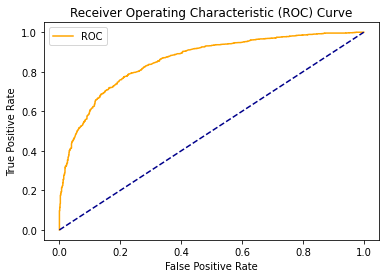

In [19]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [20]:
RAS = roc_auc_score( y_test, predictions[:, 1])

In [21]:
RAS

0.8583570289617037

Посчитаем метрики в ручную

In [23]:
predict = model.predict(X_test)

In [24]:
tp, fp, tn, fn

(927, 220, 764, 261)

Посчитаем точность модели

In [25]:
(tp+tn)/(tp+tn+fp+fn)

0.7785451197053407

Значение получилдось такое же, как и при машинном подсчете.\


Посчитаем другие метрики

In [26]:
precision = tp / (tp + fp)
precision

0.8081952920662598

In [27]:
recall = tp / (tp + fn)
recall

0.7803030303030303

In [46]:
def calc(i, X_test, y_test):
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative

    predictions = model.predict_proba( X_test )
    for predicted_prob, actual in zip( predictions[:, 1], y_test ):    
        if predicted_prob >= i:
            predicted = 1
        else:
            predicted = 0
    
        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
    
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    return tp, fp, fn, tn

def prec_recall(X_test, y_test):
    precision = []
    recall = []
    for i in np.linspace(0.01,1, 100).tolist():
        tp, fp, fn, tn = calc(i, X_test, y_test)
        if (tp+fp == 0) | (tp + fn == 0):
            break;
        else:
            precision.append(tp / (tp + fp))
            recall.append(tp / (tp + fn))
    return precision, recall

def roc(X_test, y_test):
    tpr = []
    fpr = []
    for i in np.linspace(0.01,1, 100).tolist():
        tp, fp, fn, tn = calc(i, X_test, y_test)
        if (tp+fp == 0) | (tp + fn == 0):
            break;
        else:
            tpr.append(tp / (tp + fn))
            fpr.append(fp / (fp + tn))
    return tpr, fpr

Построим график Precision-Recall

In [61]:
precision_manual, recall_manual = prec_recall(X_test, y_test)

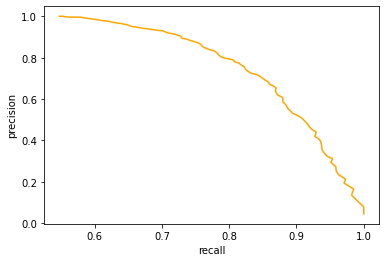

In [62]:
plt.plot(precision_manual, recall_manual, color='orange')
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

Построим ROC-кривую по данным, полученным в ручную.

In [63]:
tpr_manual, fpr_manual = roc(X_test, y_test)

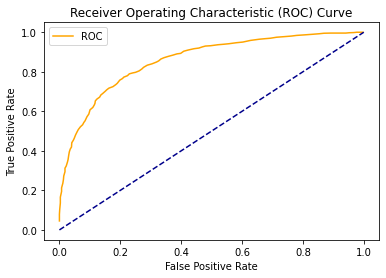

In [64]:
plt.plot(fpr_manual, tpr_manual, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Наложим друг на друга кривые, полученные разными способами.

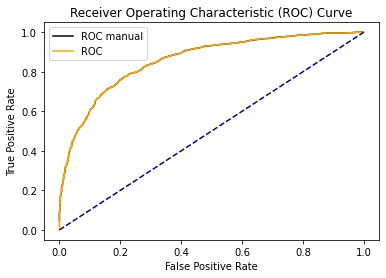

In [50]:
plt.plot(fpr_manual, tpr_manual, color='black', label='ROC manual')
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Кривые повторяют друг друга. Значит ручные расчеты верны.

Вывод.\
1. Модель неплохо справляется с предсказанием. ROC-кривая стремиться к г-образной форме. Точость около 80 %.
2. Думаю Кривая будет лежать ниже диагонали, если модль перепутала классы
